In [1]:
import numpy as np
import scipy as sp
from scipy import sparse
from scipy.sparse import linalg

import matplotlib.pyplot as plt
from IPython.display import clear_output


In [2]:
plt.rcParams['text.latex.preamble'] = r'\renewcommand{\vec}{\mathbf}'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
np.random.seed(0)

Ns = [100,500,2000]

n_trials = 10
n_pts = 10
zs = 1+np.logspace(np.log10(.1),np.log10(2),n_pts)
Rnorm = np.zeros((len(Ns),n_trials,n_pts))

for l,N in enumerate(Ns):
    for i in range(n_trials):

        G = np.random.randn(N,N)+1j*np.random.randn(N,N)
        G /= np.sqrt(2*N)

        for j,z in enumerate(zs):
            clear_output(wait=True)
            print(N,i,j)

            Rnorm[l,i,j] = 1/sp.sparse.linalg.svds(G-z*np.eye(N),k=1,which='SM')[1]

2000 9 9


In [4]:
np.save('Rnorm',Rnorm)
Rnorm = np.load('Rnorm.npy')

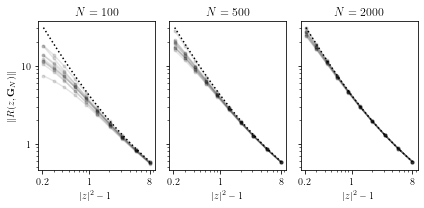

In [5]:
def em(z):
    δ = 1 - np.abs(z)**2
    return 1/np.sqrt( (8*δ**2-(9-8*δ)**(3/2)-36*δ + 27)/(8*(1-δ)) )

fig,axs = plt.subplots(1,len(Ns),figsize=(6,3),sharey=True,sharex=True)
fig.subplots_adjust(wspace=0.1)

zz = 1+np.logspace(np.log10(.1),np.log10(2))

for l,N in enumerate(Ns):
    
    axs[l].plot((zz**2-1),em(zz),color='k',ls=':')

    for i in range(n_trials):
        axs[l].plot((zs**2-1),Rnorm[l,i],color='k',marker='.',alpha=.1)
    axs[l].set_xlabel('$|z|^2-1$')
    axs[l].set_title(f'$N={N}$')

axs[0].set_xscale('log')
axs[0].set_xticks([.2,1,8])
axs[0].set_xticklabels([.2,1,8])

axs[0].set_yscale('log')
axs[0].set_yticks([1,10])
axs[0].set_yticklabels([1,10])
axs[0].set_ylabel('$\| R(z,\mathbf{G}_N)\|$')
#axs[0].set_ylabel('$\| (z\mathbf{I} - \mathbf{G}_N)^{-1} \|$')

fig.tight_layout()
plt.savefig('imgs/pseudospectra.pdf')